# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Extraction
*Reading the data from a csv file*

In [3]:
data = pd.read_csv('dataset.csv')

*Looking at the first five rows of the dataset*

In [6]:
data.head()

,symbol,exchange,date,adjusted close,option symbol,expiration,strike,call/put,style,ask,...,iv,volume,open interest,stock price for iv,*,delta,vega,gamma,theta,rho
0,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00215000,07/30/2021,215.0,C,A,224.56,...,-1.0,0,0,438.97,NaN,0.0,0.0,0.0,0.0,0.0
1,SPY,NYSEArca,07/30/2021,438.51,SPY 210730P00215000,07/30/2021,215.0,P,A,0.01,...,-1.0,0,1401,438.97,NaN,0.0,0.0,0.0,0.0,0.0
2,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00220000,07/30/2021,220.0,C,A,219.56,...,-1.0,0,1,438.97,NaN,0.0,0.0,0.0,0.0,0.0
3,SPY,NYSEArca,07/30/2021,438.51,SPY 210730P00220000,07/30/2021,220.0,P,A,0.01,...,-1.0,50,328,438.97,NaN,0.0,0.0,0.0,0.0,0.0
4,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00225000,07/30/2021,225.0,C,A,214.56,...,-1.0,0,0,438.97,NaN,0.0,0.0,0.0,0.0,0.0


*Looking at the last five rows of the dataset*

In [7]:
data.tail()

,symbol,exchange,date,adjusted close,option symbol,expiration,strike,call/put,style,ask,...,iv,volume,open interest,stock price for iv,*,delta,vega,gamma,theta,rho
221041,SPY,NYSEArca,07/01/2021,430.43,SPY 231215P00630000,12/15/2023,630.0,P,A,206.50,...,0.148305,0,1,430.26,*,-0.924500,0.750370,0.001112,-0.011128,-14.857175
221042,SPY,NYSEArca,07/01/2021,430.43,SPY 231215C00635000,12/15/2023,635.0,C,A,2.20,...,0.148310,0,146,430.26,NaN,0.051628,0.710649,0.001053,-0.005507,0.496773
221043,SPY,NYSEArca,07/01/2021,430.43,SPY 231215P00635000,12/15/2023,635.0,P,A,211.50,...,0.148310,0,0,430.26,*,-0.928176,0.710649,0.001053,-0.010792,-15.014119
221044,SPY,NYSEArca,07/01/2021,430.43,SPY 231215C00640000,12/15/2023,640.0,C,A,2.73,...,0.148310,5,1,430.26,*,0.048170,0.672488,0.000997,-0.005217,0.463973
221045,SPY,NYSEArca,07/01/2021,430.43,SPY 231215P00640000,12/15/2023,640.0,P,A,216.50,...,0.148310,0,0,430.26,*,-0.931634,0.672488,0.000997,-0.010467,-15.169052


# Data Validation and Cleansing

*All the columns of our dataset*

In [8]:
data.columns

Index(['symbol', 'exchange', 'date', 'adjusted close', 'option symbol',
       'expiration', 'strike', 'call/put', 'style', 'ask', 'bid', 'mean price',
       'iv', 'volume', 'open interest', 'stock price for iv', '*', 'delta',
       'vega', 'gamma', 'theta', 'rho'],
      dtype='object')

*No.of rows and columns in our dataset*

In [9]:
data.shape

(221046, 22)

*Generating descriptive statistics to summarize central tendency,dispersion,shape of the dataset*

In [10]:
data.describe()

,adjusted close,strike,ask,bid,mean price,iv,volume,open interest,stock price for iv,delta,vega,gamma,theta,rho
count,221046.000000,221046.000000,221046.000000,221046.000000,221046.000000,221046.000000,221046.000000,221046.000000,221046.000000,221046.000000,221046.000000,221046.000000,221046.000000,221046.000000
mean,435.089149,398.702076,41.667365,40.967420,41.315752,0.234593,405.715661,1660.743542,434.966436,0.102498,0.503011,0.005594,-0.042474,-0.067521
std,3.863763,93.725546,60.504762,59.876656,60.189057,0.225324,5100.355521,6040.663628,3.837734,0.614277,0.544469,0.009183,0.040318,1.726706
min,424.970000,25.000000,0.010000,0.000000,0.000000,-1.000000,0.000000,0.000000,425.020000,-1.000000,0.000000,0.000000,-0.779877,-15.741297
25%,432.930000,349.000000,1.660000,1.500000,1.600000,0.139646,0.000000,1.000000,432.520000,-0.240680,0.061539,0.000718,-0.056856,-0.143418
50%,435.460000,411.000000,15.910000,15.440000,15.650000,0.206940,0.000000,100.000000,435.440000,0.000000,0.293737,0.002824,-0.035767,0.000000
75%,438.510000,454.000000,52.550000,51.550000,52.040000,0.306208,19.000000,918.000000,438.140000,0.731058,0.817714,0.006464,-0.014486,0.334990
max,441.020000,655.000000,416.890000,415.230000,416.060000,1.805012,446333.000000,169905.000000,441.050000,1.000000,2.674587,0.185555,0.000000,5.584008


*Representing the missing values in the Dataset*

In [11]:
data.isnull().sum()

symbol                     0
exchange                   0
date                       0
adjusted close             0
option symbol              0
expiration                 0
strike                     0
call/put                   0
style                      0
ask                        0
bid                        0
mean price                 0
iv                         0
volume                     0
open interest              0
stock price for iv         0
*                     192007
delta                      0
vega                       0
gamma                      0
theta                      0
rho                        0
dtype: int64

*Finding the unique values for each columns*

In [10]:
data.nunique()

symbol                     1
exchange                   1
date                      21
adjusted close            21
option symbol          13960
expiration                48
strike                   312
call/put                   2
style                      1
ask                    22926
bid                    22611
mean price             36172
iv                    146910
volume                  6205
open interest          14825
stock price for iv        21
*                          1
delta                 182814
vega                  179397
gamma                  28374
theta                  91796
rho                   183742
dtype: int64

*Dropping some of the rows and columns*

In [4]:
data=data.drop(['symbol', 'exchange','option symbol','*','style'], axis=1)


*Fetching the Data until 29th date.*

In [5]:
data['date'] = pd.to_datetime(data['date'])
data=data.rename(columns = {'stock price for iv':'stockPrice'})
data_till_29 = data[~(data['date'] > '2021-07-29')]S
data_till_29.head()

,date,adjusted close,expiration,strike,call/put,ask,bid,mean price,iv,volume,open interest,stockPrice,delta,vega,gamma,theta,rho
10726,2021-07-29,440.65,07/30/2021,215.0,C,225.46,224.71,225.085,0.290659,0,0,440.13,0.999908,0.0,0.0,0.0,0.005890
10727,2021-07-29,440.65,07/30/2021,215.0,P,0.01,0.00,0.000,0.325459,0,1401,440.13,0.000000,0.0,0.0,0.0,0.000000
10728,2021-07-29,440.65,07/30/2021,220.0,C,220.46,219.71,220.085,0.290659,0,1,440.13,0.999908,0.0,0.0,0.0,0.006027
10729,2021-07-29,440.65,07/30/2021,220.0,P,0.01,0.00,0.000,0.325459,0,328,440.13,0.000000,0.0,0.0,0.0,0.000000
10730,2021-07-29,440.65,07/30/2021,225.0,C,215.46,214.71,215.085,0.290659,0,0,440.13,0.999908,0.0,0.0,0.0,0.006164


*Last 5  rows from the data*

In [38]:
data_till_29.tail()

,date,adjusted close,expiration,strike,call/put,ask,bid,mean price,iv,volume,open interest,stockPrice,delta,vega,gamma,theta,rho
221041,2021-07-01,430.43,12/15/2023,630.0,P,206.50,201.5,204.000,0.148305,0,1,430.26,-0.924500,0.750370,0.001112,-0.011128,-14.857175
221042,2021-07-01,430.43,12/15/2023,635.0,C,2.20,1.8,2.000,0.148310,0,146,430.26,0.051628,0.710649,0.001053,-0.005507,0.496773
221043,2021-07-01,430.43,12/15/2023,635.0,P,211.50,206.5,209.000,0.148310,0,0,430.26,-0.928176,0.710649,0.001053,-0.010792,-15.014119
221044,2021-07-01,430.43,12/15/2023,640.0,C,2.73,1.3,2.015,0.148310,5,1,430.26,0.048170,0.672488,0.000997,-0.005217,0.463973
221045,2021-07-01,430.43,12/15/2023,640.0,P,216.50,211.5,214.000,0.148310,0,0,430.26,-0.931634,0.672488,0.000997,-0.010467,-15.169052


# Data Aggregation and Representation

*Plotting the Date vs Stock price graph*

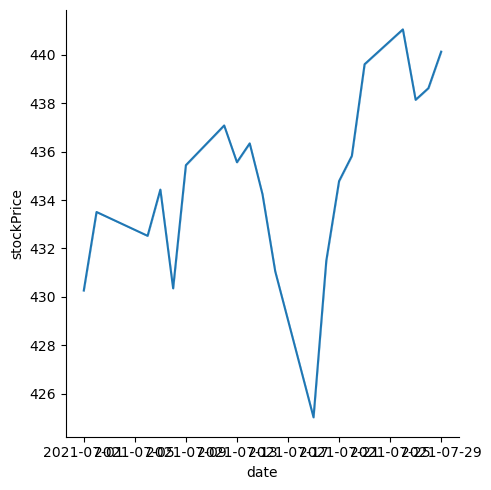

In [39]:
sns.relplot( x="date", y="stockPrice",data=data_till_29,kind='line')

*Plotting the Stock Price Graph*

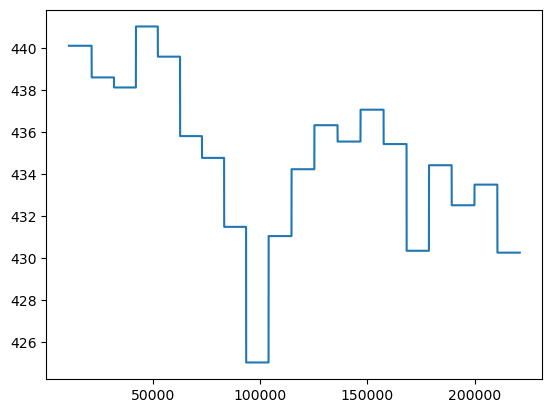

In [40]:
plt.plot(data_till_29.stockPrice)

# Data Analysis

*Information about the column data types,memory usage,column labels and null values*

In [8]:
data_till_29.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210320 entries, 10726 to 221045
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            210320 non-null  datetime64[ns]
 1   adjusted close  210320 non-null  float64       
 2   expiration      210320 non-null  object        
 3   strike          210320 non-null  float64       
 4   call/put        210320 non-null  object        
 5   ask             210320 non-null  float64       
 6   bid             210320 non-null  float64       
 7   mean price      210320 non-null  float64       
 8   iv              210320 non-null  float64       
 9   volume          210320 non-null  int64         
 10  open interest   210320 non-null  int64         
 11  stockPrice      210320 non-null  float64       
 12  delta           210320 non-null  float64       
 13  vega            210320 non-null  float64       
 14  gamma           210320 non-null 

*Moving Average of first 100 values in the data*

In [9]:
ma100=data_till_29.stockPrice.rolling(100).mean()

In [43]:
print(ma100)

10726        NaN
10727        NaN
10728        NaN
10729        NaN
10730        NaN
           ...  
221041    430.26
221042    430.26
221043    430.26
221044    430.26
221045    430.26
Name: stockPrice, Length: 210320, dtype: float64


*Moving average of first 200  values in data*

In [11]:
ma200=data_till_29.stockPrice.rolling(200).mean()
print(ma200)

10726        NaN
10727        NaN
10728        NaN
10729        NaN
10730        NaN
           ...  
221041    430.26
221042    430.26
221043    430.26
221044    430.26
221045    430.26
Name: stockPrice, Length: 210320, dtype: float64


*Graph representing the stockPrice till 29th and moving averages of first 100 and 200 values*

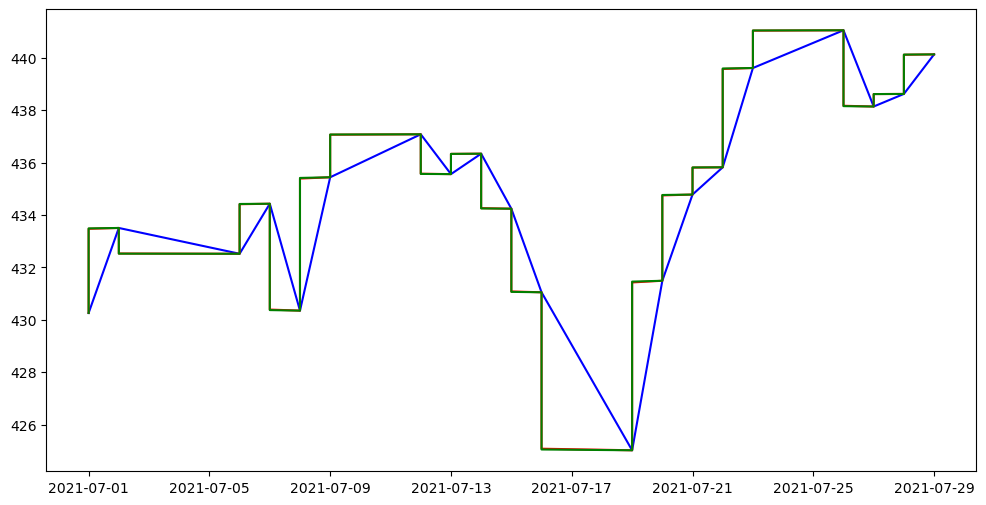

In [47]:
plt.figure(figsize=(12,6))
plt.plot(data_till_29.date,data_till_29.stockPrice,'b')
plt.plot(data_till_29.date,ma100,'r')
plt.plot(data_till_29.date,ma200,'g')

In [48]:
data_till_29.shape

(210320, 17)

## Model Training and Testing

*Splitting the dataset into training and testing*

In [6]:
# Splitting the dataset into Training and Testing
trainingData=pd.DataFrame(data_till_29['stockPrice'])
testingData=pd.DataFrame(data['stockPrice'][0:10725])
print(trainingData.shape)
print(testingData.shape)

(210320, 1)
(10725, 1)


*Scaling down the values*

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))


In [8]:
training_array=scaler.fit_transform(trainingData)
testing_array=scaler.fit_transform(testingData)


In [15]:
print(training_array)
print(testing_array)

[[0.94260761]
 [0.94260761]
 [0.94260761]
 ...
 [0.32688709]
 [0.32688709]
 [0.32688709]]
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


*Splitting the training dataset into x_train and y_train*

In [120]:
x_train=[]
y_train=[]

for i in range(100,training_array.shape[0]):
    x_train.append(training_array[i-100:i])
    y_train.append(training_array[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)
print(x_train)


[[[0.94260761]
  [0.94260761]
  [0.94260761]
  ...
  [0.94260761]
  [0.94260761]
  [0.94260761]]

 [[0.94260761]
  [0.94260761]
  [0.94260761]
  ...
  [0.94260761]
  [0.94260761]
  [0.94260761]]

 [[0.94260761]
  [0.94260761]
  [0.94260761]
  ...
  [0.94260761]
  [0.94260761]
  [0.94260761]]

 ...

 [[0.32688709]
  [0.32688709]
  [0.32688709]
  ...
  [0.32688709]
  [0.32688709]
  [0.32688709]]

 [[0.32688709]
  [0.32688709]
  [0.32688709]
  ...
  [0.32688709]
  [0.32688709]
  [0.32688709]]

 [[0.32688709]
  [0.32688709]
  [0.32688709]
  ...
  [0.32688709]
  [0.32688709]
  [0.32688709]]]


*Installing libraries keras and tensorflow*

In [54]:
!pip install keras 
!pip install tensorflow 

*Importing LSTM model and sequential model*

In [17]:
from keras.layers import Dense,Dropout,LSTM
from  keras.models import Sequential

*Creating layers for the LSTM model*

In [20]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))
          
model.add(Dense(units=1))

*Description of layers and the order in the model*

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)              

*Tarining the model*

In [15]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=4)

Epoch 1/4
6570/6570 [==============================] - 1371s 208ms/step - loss: 0.0034
Epoch 2/4
6570/6570 [==============================] - 1410s 215ms/step - loss: 0.0015
Epoch 3/4
6570/6570 [==============================] - 1449s 221ms/step - loss: 0.0014
Epoch 4/4
6570/6570 [==============================] - 1468s 223ms/step - loss: 0.0014


*Merging the first 100 columns of training with testing data*

In [38]:
past_100_days= trainingData.head(100)
final_df=past_100_days.append(testingData,ignore_index=True)
print(final_df)

       stockPrice
0          440.13
1          440.13
2          440.13
3          440.13
4          440.13
...           ...
10820      438.97
10821      438.97
10822      438.97
10823      438.97
10824      438.97

[10825 rows x 1 columns]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_2284\1095244867.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(testingData,ignore_index=True)


In [43]:
final_df.head()

,stockPrice
0,440.13
1,440.13
2,440.13
3,440.13
4,440.13


*Scaling down the testing data*

In [44]:
input_data=scaler.fit_transform(final_df)
print(input_data)

[[1.]
 [1.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]


In [45]:
input_data.shape

(10825, 1)

*Splitting the Testing dataset into x_test and y_test*

In [107]:
x_test=[] 
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(10725, 100, 1)
(10725,)


*Predicting the values for 30th*

In [47]:
#Making Predictions
y_predicted=model.predict(x_test)

336/336 [==============================] - 45s 133ms/step


In [48]:
print(y_predicted)

[0. 0. 0. ... 0. 0. 0.]
[[-0.00522405]
 [-0.00517016]
 [-0.00501982]
 ...
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]]


In [49]:
y_predicted= scaler.inverse_transform(y_predicted)
print(y_predicted)

[[438.96393]
 [438.964  ]
 [438.96417]
 ...
 [438.97   ]
 [438.97   ]
 [438.97   ]]


# Data Visualization

Text(0, 0.5, 'Stock price')

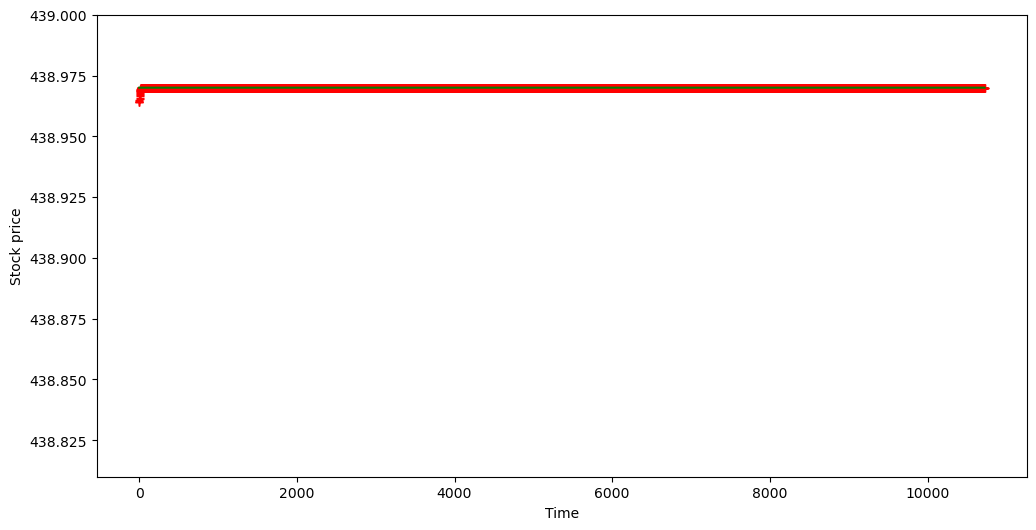

In [105]:
plt.figure(figsize=(12,6))
plt.ylim(438.81, 439)
plt.plot(y_predicted,'r+')
plt.plot(testingData,'g')
plt.xlabel('Time')
plt.ylabel('Stock price')

In [88]:
y_predicted=y_predicted.flatten()
print(y_predicted)

[438.96393 438.964   438.96417 ... 438.97    438.97    438.97   ]


In [95]:
original_value=testingData['stockPrice'].to_numpy()
original_value=original_value.flatten()
print(original_value)


[438.97 438.97 438.97 ... 438.97 438.97 438.97]


In [103]:
from sklearn.metrics import mean_squared_error


*Using mean squared error to predict accuracy ( Less the mean square error more the accuracy)*

In [97]:
print(mean_squared_error(original_value,y_predicted))

2.311852636893832e-08


# Utilization of Analysis Results

In [108]:
stock_price_till_29=data_till_29['stockPrice'].to_numpy()
print(stock_price_till_29)

[440.13 440.13 440.13 ... 430.26 430.26 430.26]


In [137]:
stock_price_till_30=np.concatenate((y_predicted, stock_price_till_29), axis=None)
stock_price_till_30=np.append(430.26,stock_price_till_30)
print(len(stock_price_till_30))

221046


In [142]:
data["predictedStockPrice"] = pd.Series(stock_price_till_30)
data.head()


,date,adjusted close,expiration,strike,call/put,ask,bid,mean price,iv,volume,open interest,stockPrice,delta,vega,gamma,theta,rho,C,predictedStockPrice
0,2021-07-30,438.51,07/30/2021,215.0,C,224.56,223.35,223.955,-1.0,0,0,438.97,0.0,0.0,0.0,0.0,0.0,430.260000,430.260000
1,2021-07-30,438.51,07/30/2021,215.0,P,0.01,0.00,0.000,-1.0,0,1401,438.97,0.0,0.0,0.0,0.0,0.0,438.963928,438.963928
2,2021-07-30,438.51,07/30/2021,220.0,C,219.56,218.35,218.955,-1.0,0,1,438.97,0.0,0.0,0.0,0.0,0.0,438.963989,438.963989
3,2021-07-30,438.51,07/30/2021,220.0,P,0.01,0.00,0.000,-1.0,50,328,438.97,0.0,0.0,0.0,0.0,0.0,438.964172,438.964172
4,2021-07-30,438.51,07/30/2021,225.0,C,214.56,213.35,213.955,-1.0,0,0,438.97,0.0,0.0,0.0,0.0,0.0,438.964478,438.964478


*Compared the stockPrice column with respect to predictedStcokPrice column*

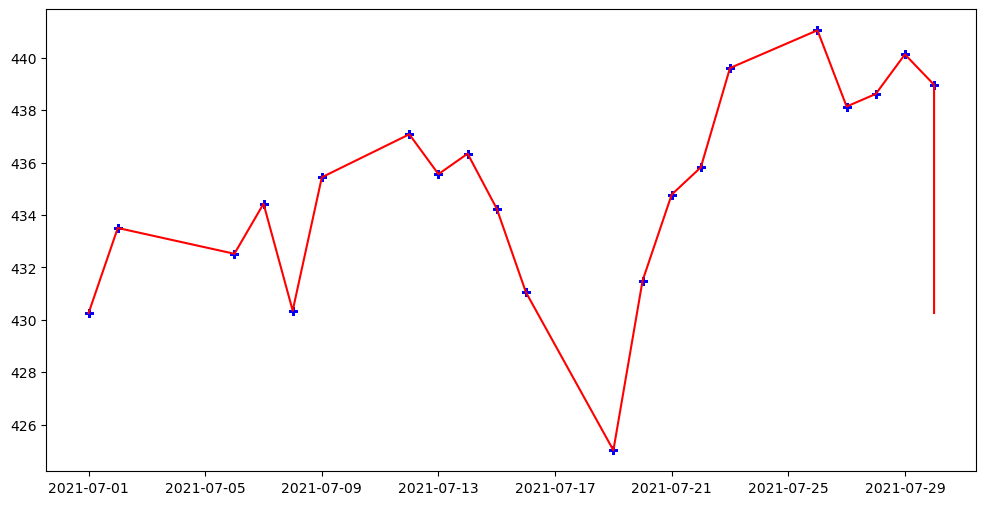

In [144]:
plt.figure(figsize=(12,6))
plt.plot(data.date,data.stockPrice,'b+')
plt.plot(data.date,data.predictedStockPrice,'r')

